# MTCR Agentic Automation – Local Prototype (v0.1)

**Author:** Navid Broumandfar – Service Analytics

This notebook is a live demo of the MTCR Agentic Automation prototype:

- Explains what MTCR is and how it works today
- Presents the agentic architecture built on top of MTCR Data.xlsm
- Runs a live demo using a local LLM (LM Studio) and sample MTCR data
- Shows the resulting AI_ columns and basic analytics


## 📖 How to Use This Notebook

**Recommended:** Use **"Run All"** from the notebook menu to execute all cells in sequence.

This notebook includes:
- 📊 Clear tables explaining the MTCR process and agent architecture
- 🤖 Live demo of the AI pipeline using your local LLM (LM Studio)
- 📈 Analysis and visualization of AI predictions

**Prerequisites:**
1. ✅ LM Studio must be running with a model loaded
2. ✅ `data/MTCR Data.xlsm` file must be present
3. ✅ Python dependencies installed (`requirements.txt`)


## 1. What is MTCR?

- **MTCR = Monthly Technical Complaints Review**
- Consolidates technical complaints across regions and product lines
- Ensures:
  - Quality and consistency of investigations
  - Alignment with SOP 029014 and governance rules
  - Visibility via KPIs and dashboards for management and operations
- Driven by:
  - CRM / TWD complaint data
  - IU / Site review comments
  - Sampling rules and technical criteria
  - Tableau dashboards and email-based review cycles


## 2. Current MTCR process (simplified)

Key points:

* `MTCR Data.xlsm` is the current orchestrator (validated macros, sampling logic).
* Reviewers manually interpret free-text comments in the **Quality Review** tab.
* KPIs and emails are produced manually or via existing macros, without an AI layer.


In [64]:
import pandas as pd

mtcr_process = pd.DataFrame(
    [
        {
            "Step": 1,
            "Actor / Tool": "CRM / TWD",
            "What happens": "Complaint, investigation and case data are managed in operational tools.",
        },
        {
            "Step": 2,
            "Actor / Tool": "MTCR Data.xlsm",
            "What happens": "Validated Excel orchestrator applies sampling rules and structures data (Dashboard + Quality Review sheets).",
        },
        {
            "Step": 3,
            "Actor / Tool": "IU / Site reviewers",
            "What happens": "Reviewers interpret free-text comments in the Quality Review sheet and decide corrections.",
        },
        {
            "Step": 4,
            "Actor / Tool": "Excel macros / Tableau / Email",
            "What happens": "KPIs and review/correction launch emails are prepared and shared with stakeholders.",
        },
    ]
)

mtcr_process


,Step,Actor / Tool,What happens
0,1,CRM / TWD,"Complaint, investigation and case data are managed in operational tools."
1,2,MTCR Data.xlsm,Validated Excel orchestrator applies sampling rules and structures data (Dashboard + Quality Review sheets).
2,3,IU / Site reviewers,Reviewers interpret free-text comments in the Quality Review sheet and decide corrections.
3,4,Excel macros / Tableau / Email,KPIs and review/correction launch emails are prepared and shared with stakeholders.


**Understanding the Current Process:**

The table above shows the 4-step manual workflow that reviewers follow today. Each step depends on the previous one, creating a sequential review chain. The bottleneck is Step 3, where reviewers must manually interpret free-text comments and decide on corrections—this is where AI assistance can add the most value.

## 3. Agentic Automation – Architecture (local prototype)

This prototype adds a safe, assistive AI layer **on top** of the existing MTCR Excel process.

**Design Philosophy:**

This prototype follows a **non-invasive, assistive approach**:
- ✅ **Read-only**: Never modifies the validated Excel files
- ✅ **Suggestions only**: AI provides recommendations, reviewers make final decisions
- ✅ **Traceable**: Every AI inference is logged for audit and quality assurance
- ✅ **Local-first**: Runs entirely on your machine using LM Studio (no cloud dependencies)

The goal is to **augment** reviewer judgment, not replace it.


In [65]:
import matplotlib.pyplot as plt

agent_pipeline = pd.DataFrame(
    [
        {
            "Step": 1,
            "Component": "Excel Reader (M1)",
            "What it does": "Reads a sampled subset of rows from the Quality Review sheet in MTCR Data.xlsm.",
        },
        {
            "Step": 2,
            "Component": "SOP / RAG Context (M6)",
            "What it does": "Retrieves relevant guidance from SOP 029014 and attachments using RAG (Retrieval-Augmented Generation) to ground the AI.",
        },
        {
            "Step": 3,
            "Component": "AI Review Assistant (M2 + LM Studio)",
            "What it does": "Uses a local LLM to suggest a standardized Reason for Correction, a short rationale, and a confidence score.",
        },
        {
            "Step": 4,
            "Component": "Safe Writer (M3)",
            "What it does": "Writes AI_ columns into a demo CSV file only (no changes to the validated Excel).",
        },
        {
            "Step": 5,
            "Component": "Log Manager (M4)",
            "What it does": "Logs every inference in JSONL for QA traceability and future fine-tuning.",
        },
        {
            "Step": 6,
            "Component": "Orchestrator Demo (M10)",
            "What it does": "Runs the end-to-end pipeline on N rows and reports how it performed.",
        },
    ]
)


# Display with full text visible (no truncation)
pd.set_option('display.max_colwidth', None)
agent_pipeline


,Step,Component,What it does
0,1,Excel Reader (M1),Reads a sampled subset of rows from the Quality Review sheet in MTCR Data.xlsm.
1,2,SOP / RAG Context (M6),Retrieves relevant guidance from SOP 029014 and attachments using RAG (Retrieval-Augmented Generation) to ground the AI.
2,3,AI Review Assistant (M2 + LM Studio),"Uses a local LLM to suggest a standardized Reason for Correction, a short rationale, and a confidence score."
3,4,Safe Writer (M3),Writes AI_ columns into a demo CSV file only (no changes to the validated Excel).
4,5,Log Manager (M4),Logs every inference in JSONL for QA traceability and future fine-tuning.
5,6,Orchestrator Demo (M10),Runs the end-to-end pipeline on N rows and reports how it performed.


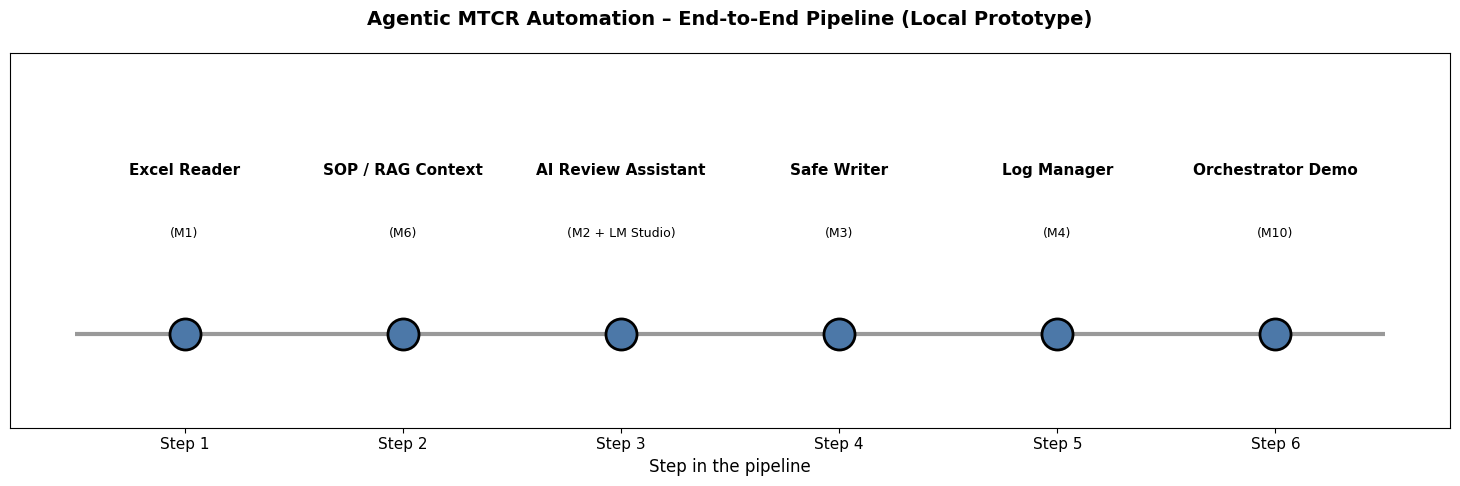

In [87]:
# Visual summary of the agentic MTCR automation pipeline (step-by-step flow)

# Safety check
assert "agent_pipeline" in globals(), "agent_pipeline DataFrame is not defined."

steps = agent_pipeline["Step"].tolist()
components = agent_pipeline["Component"].tolist()

# Create a larger figure with more vertical space
fig, ax = plt.subplots(figsize=(16, 5))

# Draw a horizontal line representing the pipeline
ax.hlines(y=1.0, xmin=min(steps) - 0.5, xmax=max(steps) + 0.5, colors="#999999", linewidth=3)

# Draw larger nodes for each step
ax.scatter(steps, [1.0] * len(steps), s=500, color="#4C78A8", edgecolor="black", linewidth=2, zorder=3)

# Add labels above each node with better spacing and larger font
for x, label in zip(steps, components):
    # Split long labels at parentheses or slashes for better readability
    if "(" in label:
        parts = label.split("(")
        main = parts[0].strip()
        detail = "(" + parts[1] if len(parts) > 1 else ""
        # Display main text
        ax.text(
            x,
            1.25,
            main,
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight='bold',
            wrap=True
        )
        # Display detail in smaller font if present
        if detail:
            ax.text(
                x,
                1.15,
                detail,
                ha="center",
                va="bottom",
                fontsize=9,
                wrap=True
            )
    else:
        ax.text(
            x,
            1.20,
            label,
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight='bold',
            wrap=True
        )

ax.set_title("Agentic MTCR Automation – End-to-End Pipeline (Local Prototype)", fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Step in the pipeline", fontsize=12)

ax.set_yticks([])
ax.set_xticks(steps)
ax.set_xticklabels([f"Step {s}" for s in steps], fontsize=11)

ax.set_ylim(0.85, 1.45)
ax.set_xlim(min(steps) - 0.8, max(steps) + 0.8)
plt.subplots_adjust(bottom=0.15, top=0.9, left=0.05, right=0.95)


## 4. Setup and Configuration

Before running the demo, we need to:
1. Import required libraries (pandas, matplotlib, and our custom modules)
2. Configure the notebook for inline plotting
3. Load configuration settings (file paths, sheet names, output directories)

The setup cell below initializes everything needed for the live demo.


In [67]:
# 4. Imports and setup for the demo

%matplotlib inline

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from src.utils.config_loader import load_config
from src.utils.lmstudio_smoketest import test_lmstudio_connection
from src.ai.orchestrator import run_demo

print("✅ Setup complete! Ready to run the demo.")


✅ Setup complete! Ready to run the demo.


**Why Test the Connection First?**

Before processing any data, we verify that:
- LM Studio is running and accessible
- A model is loaded and ready to respond
- The API endpoint is correct (default: `http://127.0.0.1:1234/v1`)

This prevents errors later and gives clear feedback if something is misconfigured.


In [68]:
# 5. Test local LLM connection (LM Studio)

config = load_config()
print("Loaded config:")
print(f"  Input file: {config.input_file}")
print(f"  Sheet name: {config.sheet_name}")
print(f"  Output dir: {config.out_dir}")

try:
    ok = test_lmstudio_connection()
    print("\nLM Studio connection:", "OK ✅" if ok else "FAILED ❌")
except Exception as e:
    print("LM Studio connection test failed ❌")
    print(type(e).__name__, "-", e)


Loaded config:
  Input file: data/MTCR Data.xlsm
  Sheet name: Quality Review
  Output dir: out
[SMOKE TEST] Testing connection to: http://127.0.0.1:1234/v1
[OK] Connected to LM Studio
  Response: **MTCR Agentic Pipeline Connection Established**

Hello, this is an AI assistant connected to the Mu...

LM Studio connection: OK ✅


**What This Demo Does:**

When you run the cell below, the orchestrator will:
1. Load a small sample (default: 3 rows) from the Quality Review sheet
2. For each row, retrieve relevant SOP context using RAG
3. Call the local LLM to generate AI suggestions (Reason, Confidence, Rationale)
4. Write results to a demo CSV file (safe, no Excel changes)
5. Log all inferences to JSONL for traceability

**Expected duration:** ~10-30 seconds for 3 rows (depends on your hardware and model size).


In [69]:
# 6. Run MTCR demo pipeline on a small sample

demo_rows = 3  # adjust as needed for the live demo

result = run_demo(sample_size=demo_rows)

print("\nDemo completed.")
print("Rows processed:", result.get("rows_processed"))
print("Average confidence:", result.get("avg_confidence"))
print("Output CSV:", result.get("output_path"))
print("Log file:", result.get("log_path"))


INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO:src.ai.review_assistant:Review Assistant initialized with LM Studio at http://127.0.0.1:1234/v1


MTCR Demo Orchestrator - Starting Pipeline
[STEP 1] Load config: Configuration loaded
  input_file: data/MTCR Data.xlsm
  sheet_name: Quality Review
  out_dir: out


c:\Users\91002917\OneDrive - bioMerieux\Bureau\bMx\MTCR_Agentic_Automation\src\excel\mtcr_reader.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: (None if (pd.isna(x) or str(x).strip() == "") else x))
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


[STEP 2] Load sample from Quality Review: Loaded 28784 rows
  total_rows: 28784
  columns: 21
  sheet: Quality Review
[STEP 2] Load sample from Quality Review: Sampled 3 rows for demo
[STEP 3] Build context (RAG): SOP indexer initialized
  embeddings_dir: data/embeddings
[STEP 4] Call LLM for reasoning: Processing 3 rows


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  Processed row 1/3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  Processed row 2/3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  Processed row 3/3
[STEP 4] Call LLM for reasoning: Completed inference for 3 rows
  ai_columns_added: 5
[STEP 5] Write AI_ columns to demo CSV: Saved to out\mtcr_ai_demo.csv
  rows: 3
  columns: 26
[STEP 6] Log each inference: Logs written to logs\mtcr_demo_orchestrator.jsonl
[DONE] Summary:
  Rows processed: 3
  Average confidence: 0.867
  Output file: out\mtcr_ai_demo.csv
  Log file: logs\mtcr_demo_orchestrator.jsonl

Demo completed.
Rows processed: 3
Average confidence: 0.867
Output CSV: out\mtcr_ai_demo.csv
Log file: logs\mtcr_demo_orchestrator.jsonl


**Understanding the Demo Output:**

The CSV file contains:
- **Original columns**: All 21 columns from the Quality Review sheet (unchanged)
- **AI_ columns**: 5 new columns added by the AI:
  - `AI_ReasonSuggestion`: Standardized reason for correction
  - `AI_Confidence`: Confidence score (0.0 to 1.0)
  - `AI_RationaleShort`: Brief explanation of the suggestion
  - `AI_CommentStandardized`: Cleaned/standardized version of the comment
  - `AI_ModelVersion`: Which model version was used

Reviewers can use these AI suggestions to speed up their decision-making while maintaining full control.


**Analyzing AI Suggestions:**

The chart below shows the distribution of AI reason suggestions across the sample. This helps us understand:
- **Most common reasons**: Which correction types appear most frequently
- **Label quality**: Whether the AI is producing readable, standardized reasons
- **Coverage**: How well the taxonomy covers the cases in the sample

**Note:** Long or complex labels are automatically cleaned and truncated for readability.


In [70]:
# 7. Inspect demo output

# Check if result exists from previous cell
if 'result' not in globals():
    print("⚠️ Warning: Run cell 6 first to generate demo results!")
    result = {"output_path": "out/mtcr_ai_demo.csv"}

output_path = Path(result.get("output_path", "out/mtcr_ai_demo.csv"))

if not output_path.exists():
    raise FileNotFoundError(f"Expected demo output CSV not found at {output_path}")

df_demo = pd.read_csv(output_path)

print(f"Demo dataset loaded from: {output_path}")
print(f"Shape: {df_demo.shape[0]} rows x {df_demo.shape[1]} columns")

# Show a preview of the first rows
df_demo.head(10)


Demo dataset loaded from: out\mtcr_ai_demo.csv
Shape: 3 rows x 26 columns


,Month of the Review,Case Owner,Case Number,Visitor Country,Market,Catalog Profile (Extract),Site Review,Site,Error Code Change,Catalog Profile Change,...,Not a TC,Phone Number missing,Other,Catalog Profile Code,Subsidiary,AI_ReasonSuggestion,AI_Confidence,AI_CommentStandardized,AI_RationaleShort,AI_ModelVersion
0,2024-12-01 00:00:00,Zaidruslan KUMUDAW,32573638,Thailand,0010 - Clinical,C57 - VITEK 2 COMPACT,OK,STL,NaN,NaN,...,NaN,NaN,NaN,C57,Thailand,Insufficient Response,0.8,The response provided does not contain sufficient information to address the issue.,This reason was selected because the comment 'OK' is a brief affirmative but lacks details about the issue or its resolution.,MTCR-Llama3-v0.1
1,2024-12-01 00:00:00,Johan HASSELSTROM,32559748,Denmark,0020 - Industry,C40 - AIR IDEAL,"Wronge Error code, please update to C402 - External damage, according the Error code description.\nATC : Need more details = Top cover replaced + cover seal.",Industry System,1.0,NaN,...,NaN,NaN,NaN,C40,Nordics,Error Code Inconsistency,0.9,"The error code was incorrect; it should be updated to C402 - External damage, according to the error code description.",This reason was selected because the comment specifically mentions an incorrect error code and requests an update based on its description.,MTCR-Llama3-v0.1
2,2023-07-01 00:00:00,Gustavo ECHEVERRIA,31750185,Argentina,0020 - Industry,CC1 - GENE-UP INSTRUMENT,"Wrong trouble shooting. They should have control the cleaness of the thermal block, strip position, tube position.\nLack of guidance for the customer to avoid the issue to appears again.",Industry System,NaN,NaN,...,NaN,NaN,NaN,CC1,Argentina,Insufficient Troubleshooting Guidance,0.9,"The customer was not provided with sufficient guidance to troubleshoot the issue, specifically regarding thermal block cleanliness, strip position, and tube position.",This reason is selected based on the comment's mention of 'wrong trouble shooting' and lack of guidance for the customer. The standardized reason aligns with SOP 029014's taxonomy for Insufficient Troubleshooting Guidance.,MTCR-Llama3-v0.1


**Quality Assurance Checks:**

Not all AI suggestions are perfect. This section identifies:
- **Low confidence predictions** (< 0.5): Cases where the AI is uncertain
- **Errors**: Cases where the LLM failed to produce valid output

These cases should be **reviewed manually** or **flagged for human oversight**. The goal is transparency: we show where the AI is confident and where it needs help.


Using reason column: AI_ReasonSuggestion

Reason Distribution:


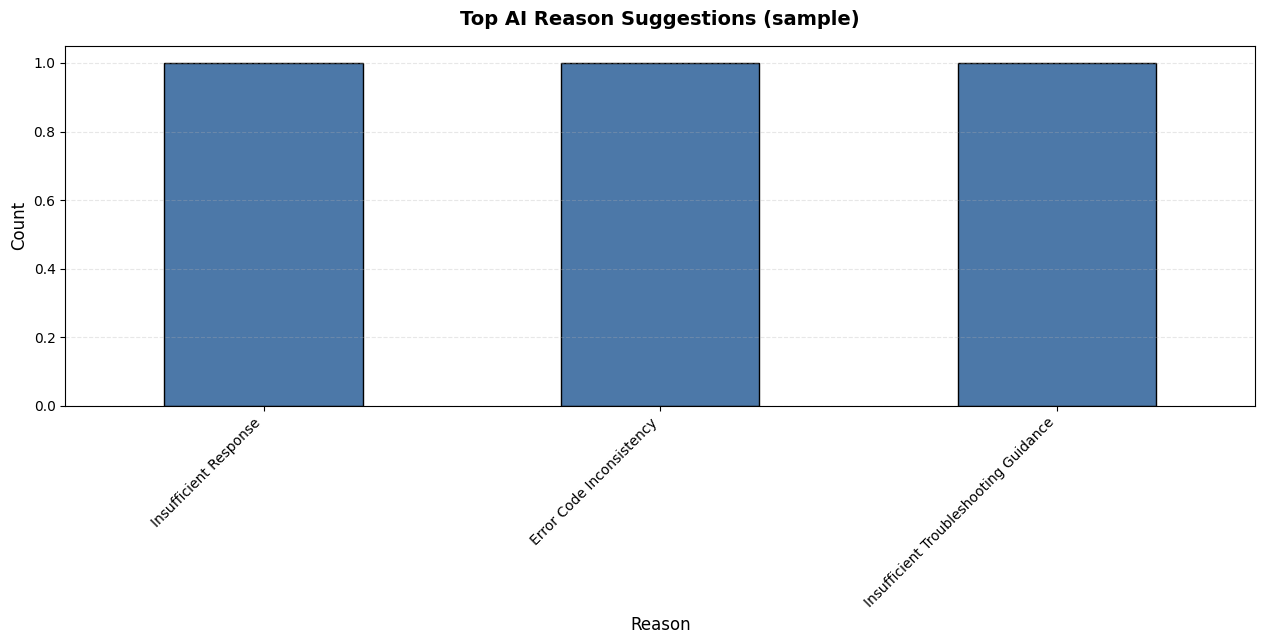

In [72]:
# 8. Quick visualization – distribution of AI reason suggestions

candidate_cols = [
    c for c in df_demo.columns if "AI_Reason" in c or "AI_ReasonSuggestion" in c
]

if candidate_cols:
    reason_col = candidate_cols[0]
    print(f"Using reason column: {reason_col}")

    reason_counts = df_demo[reason_col].value_counts().head(10)
    
    # Clean up labels: handle Python list/dict strings and truncate long text
    def clean_label(label):
        """Clean and truncate label for better readability."""
        if pd.isna(label):
            return "N/A"
        
        label_str = str(label)
        
        # If it looks like a Python list/dict representation, try to extract meaningful text
        if label_str.startswith('[') or label_str.startswith('{'):
            # Try to extract category/subcategory if it's a dict-like structure
            import re
            # Match category/subcategory with either single or double quotes (unified pattern)
            # Match category with either single or double quotes
            # Match category with either single or double quotes
            cat_match = re.search(r"category'\s*:\s*'([^']+)'", label_str) or \
                       re.search(r'category"\s*:\s*"([^"]+)"', label_str)
            # Match subcategory with either single or double quotes
            # Match subcategory with either single or double quotes
            subcat_match = re.search(r"subcategory'\s*:\s*'([^']+)'", label_str) or \
                          re.search(r'subcategory"\s*:\s*"([^"]+)"', label_str)
            
            parts = []
            if cat_match:
                parts.append(cat_match.group(1))
            if subcat_match:
                parts.append(subcat_match.group(1))
            if parts:
                return " / ".join(parts[:2])
            import re
            # Look for 'category' or 'subcategory' patterns
            # Match category with either single or double quotes
            # Extract category and subcategory values
            # Match: 'category': 'value' or "category": "value"
            # Extract category and subcategory values
            # Match: 'category': 'value' or "category": "value"
        
        # Truncate very long labels
        if len(label_str) > 50:
            return label_str[:47] + "..."
        
        return label_str
    
    # Create cleaned labels
    cleaned_labels = [clean_label(label) for label in reason_counts.index]
    reason_counts_cleaned = reason_counts.copy()
    reason_counts_cleaned.index = cleaned_labels

    fig, ax = plt.subplots(figsize=(14, 6))
    reason_counts_cleaned.plot(kind="bar", ax=ax, color="#4C78A8", edgecolor="black")
    ax.set_title("Top AI Reason Suggestions (sample)", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Reason", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    
    # Rotate labels and adjust for readability
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add grid for better readability
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    plt.subplots_adjust(bottom=0.3, top=0.9, left=0.1, right=0.95)
    
    print("\nReason Distribution:")
    reason_counts
else:
    print("No AI_Reason* column found in the demo output.")


In [73]:
# 9. Inspect error cases and low-confidence predictions

import json

# Check dependencies from previous cells
if 'df_demo' not in globals() or 'reason_col' not in globals():
    print("⚠️ Warning: Run cells 7 and 8 first!")
    raise NameError("Required variables not defined. Please run previous cells.")

# Show rows with errors or low confidence
print("=" * 60)
print("ROWS WITH ERRORS OR LOW CONFIDENCE (<0.5)")
print("=" * 60)

error_rows = df_demo[
    (df_demo[reason_col].str.contains("Error:", na=False)) | 
    (df_demo["AI_Confidence"] < 0.5)
]

if len(error_rows) > 0:
    print(f"\nFound {len(error_rows)} rows needing review:\n")
    for idx, row in error_rows.iterrows():
        print(f"Row {idx}:")
        print(f"  Reason: {row.get(reason_col, 'N/A')}")
        print(f"  Confidence: {row.get('AI_Confidence', 'N/A')}")
        print(f"  Rationale: {row.get('AI_RationaleShort', 'N/A')[:100]}")
        print()
    
    # Load and display the last few log entries for these errors
    log_path = Path("logs/mtcr_review_assistant.jsonl")
    if log_path.exists():
        print("\n" + "=" * 60)
        print("RECENT LOG ENTRIES (last 5)")
        print("=" * 60)
        with open(log_path, "r", encoding="utf-8") as f:
            logs = [json.loads(line) for line in f.readlines()[-5:]]
        
        for i, log in enumerate(logs, 1):
            print(f"\n[{i}] Timestamp: {log.get('timestamp', 'N/A')}")
            print(f"    Error: {log.get('error', 'None')}")
            if log.get('response'):
                print(f"    Response keys: {list(log['response'].keys())}")
else:
    print("\n✅ No errors or low-confidence predictions found!")

print("\n" + "=" * 60)


ROWS WITH ERRORS OR LOW CONFIDENCE (<0.5)

✅ No errors or low-confidence predictions found!



## 9. Roadmap and potential next steps

**What is already implemented locally:**

- M1–M4: Excel reader, AI review assistant, safe writer, JSONL logger
- M5–M7: Taxonomy manager, SOP indexer (RAG = Retrieval-Augmented Generation), model card generator
- M8–M9: Correction tracking and publication agents (prototype level)
- M10: Orchestrator + demo pipeline with local LLM (LM Studio)

All of this runs **locally** on a work laptop, without changing:
- Existing macros in `MTCR Data.xlsm`
- Tableau dashboards
- Existing email processes

**What would be needed to go further, in a controlled way:**

1. Read-only access to MTCR data in the data lake (to avoid exporting Excel manually).  
2. Access to internal LLM APIs (same pattern as LM Studio, with governance).  
3. A small, governed pilot with the relevant stakeholders to evaluate:
   - Accuracy and override rate
   - Impact on review time
   - Alignment with quality and compliance constraints


In [78]:
roadmap = pd.DataFrame(
    [
        {"Module": "M1", "Status": "Done", "Focus": "Excel Reader – load Quality Review safely"},
        {"Module": "M2", "Status": "Done", "Focus": "AI Review Assistant – generate suggestions"},
        {"Module": "M3", "Status": "Done", "Focus": "Safe Writer – AI_ columns to demo CSV"},
        {"Module": "M4", "Status": "Done", "Focus": "Log Manager – JSONL logs + metrics"},
        {"Module": "M5", "Status": "Done", "Focus": "Taxonomy Manager – standard reasons"},
        {"Module": "M6", "Status": "Done", "Focus": "SOP Indexer – RAG embeddings"},
        {"Module": "M7", "Status": "Done", "Focus": "Model Card Generator – document the model"},
        {"Module": "M8", "Status": "Prototype", "Focus": "Correction Tracker Agent – follow-up view"},
        {"Module": "M9", "Status": "Prototype", "Focus": "Publication Agent – KPI/email scaffolding"},
        {"Module": "M10", "Status": "Done", "Focus": "Orchestrator + LM Studio demo pipeline"},
        {"Module": "M11", "Status": "Planned", "Focus": "MCP tools / richer agent orchestration"},
        {"Module": "M12", "Status": "Planned", "Focus": "QA dashboards, evals and accuracy tracking"},
        {"Module": "M13", "Status": "Planned", "Focus": "Data lake + internal LLM integration (Anthropic, etc.)"},
        {"Module": "M14", "Status": "Planned", "Focus": "Supervised Fine-tuning pipeline – custom model training"},
        {"Module": "M15", "Status": "Planned", "Focus": "Advanced KPI automation – predictive analytics"},
        {"Module": "M16", "Status": "Planned", "Focus": "ML model training infrastructure – continuous learning"},
        {"Module": "M17", "Status": "Planned", "Focus": "Automated quality metrics – real-time dashboards"},
        {"Module": "M18", "Status": "Planned", "Focus": "Multi-model ensemble – improved accuracy"},
        {"Module": "M19", "Status": "Planned", "Focus": "Feedback loop automation – model improvement"},
        {"Module": "M20", "Status": "Planned", "Focus": "Production deployment – scalable architecture"},
    ]
)

roadmap


,Module,Status,Focus
0,M1,Done,Excel Reader – load Quality Review safely
1,M2,Done,AI Review Assistant – generate suggestions
2,M3,Done,Safe Writer – AI_ columns to demo CSV
3,M4,Done,Log Manager – JSONL logs + metrics
4,M5,Done,Taxonomy Manager – standard reasons
5,M6,Done,SOP Indexer – RAG embeddings
6,M7,Done,Model Card Generator – document the model
7,M8,Prototype,Correction Tracker Agent – follow-up view
8,M9,Prototype,Publication Agent – KPI/email scaffolding
9,M10,Done,Orchestrator + LM Studio demo pipeline


**Module Status Overview:**

The roadmap table below shows the current state of each module (M1–M13). This helps stakeholders understand:
- **What's production-ready** (Done = fully implemented and tested)
- **What's in development** (Prototype = working but needs refinement)
- **What's planned** (Planned = future enhancements)

All modules are designed to work together as a cohesive system while remaining independently testable.


C:\Users\91002917\AppData\Local\Temp\ipykernel_22544\1466224500.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


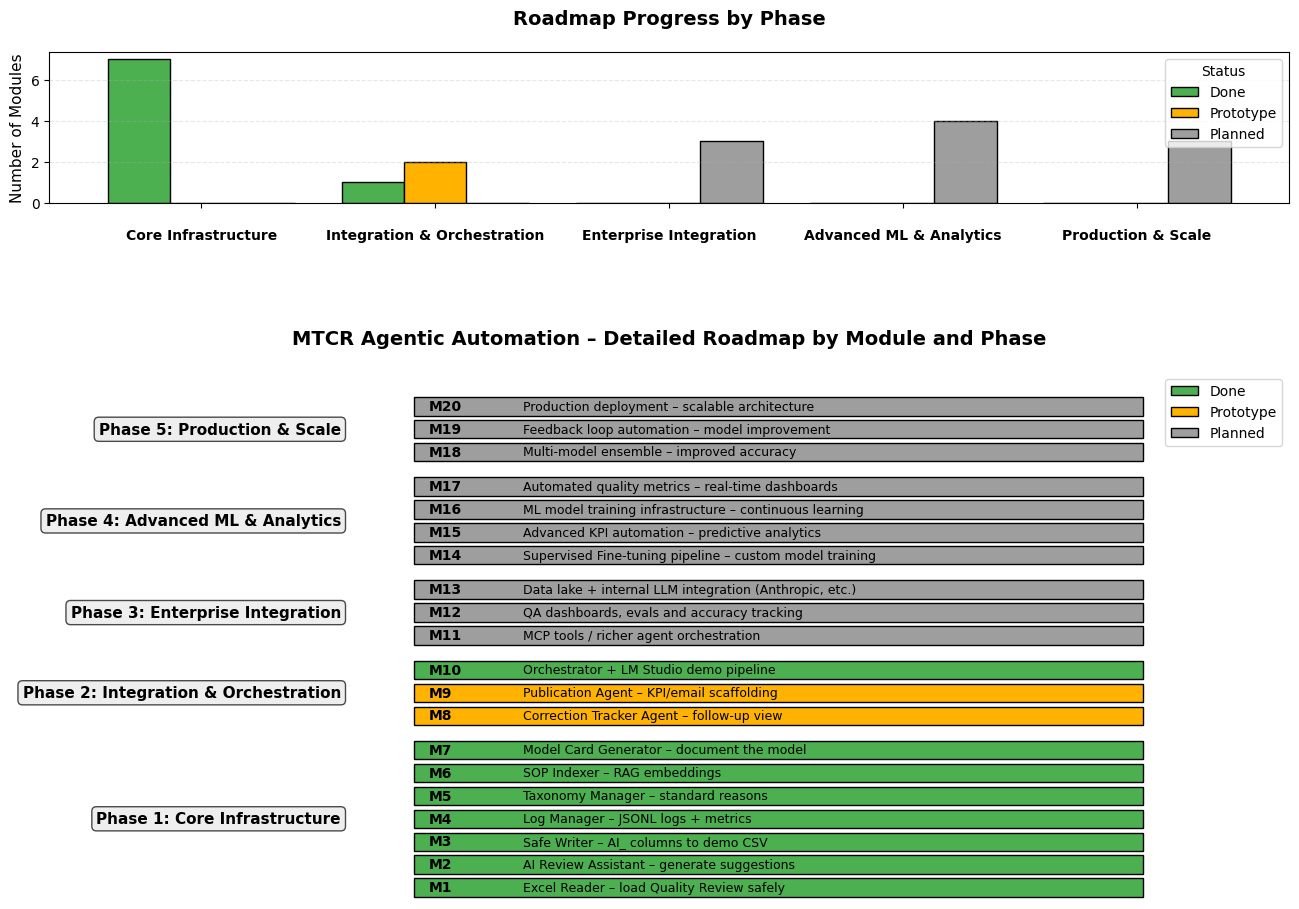


ROADMAP SUMMARY
Total Modules: 20
Done: 8
Prototype: 2
Planned: 10
Progress: 40.0% complete


In [80]:
# Enhanced visual summary of the roadmap by module and status
# Creates a more informative visualization with phases and progress indicators

# Ensure the roadmap DataFrame exists
assert "roadmap" in globals(), "roadmap DataFrame is not defined."

roadmap_for_plot = roadmap.copy().reset_index(drop=True)

# Map Status → color and define phases
status_colors = {
    "Done": "#4CAF50",        # green
    "Prototype": "#FFB300",   # amber/orange
    "Planned": "#9E9E9E",     # grey
}

# Define phases for better organization
def get_phase(module_num):
    """Assign modules to phases based on their number."""
    if module_num <= 7:
        return "Phase 1: Core Infrastructure"
    elif module_num <= 10:
        return "Phase 2: Integration & Orchestration"
    elif module_num <= 13:
        return "Phase 3: Enterprise Integration"
    elif module_num <= 17:
        return "Phase 4: Advanced ML & Analytics"
    else:
        return "Phase 5: Production & Scale"

# Add phase information
roadmap_for_plot["Phase"] = roadmap_for_plot["Module"].str.extract(r'M(\d+)')[0].astype(int).apply(get_phase)
roadmap_for_plot["ModuleNum"] = roadmap_for_plot["Module"].str.extract(r'M(\d+)')[0].astype(int)

# Create figure with subplots for better visualization
fig = plt.figure(figsize=(16, 11))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 3.5], hspace=0.5)

# Top subplot: Status summary by phase
ax1 = fig.add_subplot(gs[0])
phase_summary = roadmap_for_plot.groupby(["Phase", "Status"]).size().unstack(fill_value=0)

# Ensure columns are in the correct order: Done, Prototype, Planned
status_order = ["Done", "Prototype", "Planned"]
phase_summary = phase_summary.reindex(columns=[s for s in status_order if s in phase_summary.columns], fill_value=0)

# Create the bar plot with proper color mapping
bars = phase_summary.plot(kind="bar", ax=ax1, 
                          color=[status_colors.get(s, "#9E9E9E") for s in phase_summary.columns], 
                          edgecolor="black", width=0.8)

ax1.set_title("Roadmap Progress by Phase", fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel("")
ax1.set_ylabel("Number of Modules", fontsize=11)

# Fix legend to match actual colors and order
legend_handles = []
for status in status_order:
    if status in phase_summary.columns:
        from matplotlib.patches import Patch
        legend_handles.append(Patch(facecolor=status_colors[status], edgecolor="black", label=status))

ax1.legend(handles=legend_handles, title="Status", loc="upper right", fontsize=10)

# Improve x-axis label readability - use horizontal labels with shortened phase names
phase_labels = [label.replace("Phase 1: ", "").replace("Phase 2: ", "").replace("Phase 3: ", "")
                .replace("Phase 4: ", "").replace("Phase 5: ", "") for label in phase_summary.index]
ax1.set_xticklabels(phase_labels, rotation=0, ha="center", fontsize=10, fontweight='bold')
ax1.tick_params(axis='x', pad=15)  # Add padding below x-axis labels

ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Bottom subplot: Detailed module view with phases
ax2 = fig.add_subplot(gs[1])

# Group by phase and create sections
phases = roadmap_for_plot["Phase"].unique()
y_positions = []
y_labels = []
current_y = 0

for phase in phases:
    phase_data = roadmap_for_plot[roadmap_for_plot["Phase"] == phase].sort_values("ModuleNum")
    
    # Add phase separator
    y_positions.append(current_y - 0.5)
    y_labels.append("")
    current_y += 0.5
    
    # Add modules in this phase
    for idx, row in phase_data.iterrows():
        y_positions.append(current_y)
        y_labels.append(f"{row['Module']}: {row['Focus'][:50]}...")
        current_y += 1
    
    current_y += 0.3

# Create horizontal bars
colors_list = [status_colors.get(status, "#9E9E9E") for status in roadmap_for_plot["Status"]]
bar_widths = [1.0] * len(roadmap_for_plot)

# Plot with phase grouping
y_pos = 0
for phase in phases:
    phase_data = roadmap_for_plot[roadmap_for_plot["Phase"] == phase].sort_values("ModuleNum")
    y_start = y_pos
    
    for idx, row in phase_data.iterrows():
        ax2.barh(y_pos, 1.0, color=status_colors[row["Status"]], edgecolor="black", height=0.8)
        # Add module label
        ax2.text(0.02, y_pos, f"{row['Module']}", va="center", fontsize=10, fontweight='bold')
        # Add focus text (truncated)
        focus_text = row['Focus'][:60] + "..." if len(row['Focus']) > 60 else row['Focus']
        ax2.text(0.15, y_pos, focus_text, va="center", fontsize=9)
        y_pos += 1
    
    # Add phase label
    ax2.text(-0.1, (y_start + y_pos - 1) / 2, phase, ha="right", va="center", 
             fontsize=11, fontweight='bold', rotation=0, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="#E8E8E8", alpha=0.7))
    y_pos += 0.5

ax2.set_xlim(-0.5, 1.2)
ax2.set_ylim(-0.5, y_pos)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("MTCR Agentic Automation – Detailed Roadmap by Module and Phase", 
               fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add legend with consistent colors
from matplotlib.patches import Patch
legend_handles_bottom = [
    Patch(facecolor=status_colors["Done"], edgecolor="black", label="Done"),
    Patch(facecolor=status_colors["Prototype"], edgecolor="black", label="Prototype"),
    Patch(facecolor=status_colors["Planned"], edgecolor="black", label="Planned"),
]
ax2.legend(handles=legend_handles_bottom, loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("ROADMAP SUMMARY")
print("="*70)
print(f"Total Modules: {len(roadmap_for_plot)}")
print(f"Done: {len(roadmap_for_plot[roadmap_for_plot['Status'] == 'Done'])}")
print(f"Prototype: {len(roadmap_for_plot[roadmap_for_plot['Status'] == 'Prototype'])}")
print(f"Planned: {len(roadmap_for_plot[roadmap_for_plot['Status'] == 'Planned'])}")
print(f"Progress: {len(roadmap_for_plot[roadmap_for_plot['Status'] == 'Done']) / len(roadmap_for_plot) * 100:.1f}% complete")
print("="*70)


## 10. Interactive MTCR Chat (Local LLM)

This section provides an interactive chat interface with the MTCR-specialized agent running through LM Studio.

**Features:**
- The agent understands the MTCR process and the MTCR_Agentic_Automation modules (M1–M10)
- Uses the same local LLM endpoint as the orchestrator demo
- Perfect for Q&A, explanations, and "what-if" questions about the pipeline

**Note:** This feature requires `ipywidgets` to be installed. If unavailable, the chat UI will be disabled.


In [76]:
# 10. Interactive MTCR Chat UI - Setup and imports
# This section provides an optional interactive chat interface with the MTCR agent.
# Note: Requires ipywidgets to be installed (pip install ipywidgets)

try:
    import ipywidgets as widgets
    from IPython.display import HTML
    from src.utils.mtcr_chat import mtcr_chat
    IPYWIDGETS_AVAILABLE = True
    print("✅ Chat UI imports loaded successfully")
except Exception as e:  # noqa: BLE001
    IPYWIDGETS_AVAILABLE = False
    IPYWIDGETS_IMPORT_ERROR = e
    print(f"⚠️ Chat UI imports failed: {e}")
    print("   The chat UI will be disabled. Install with: pip install ipywidgets")


✅ Chat UI imports loaded successfully


In [77]:
if not IPYWIDGETS_AVAILABLE:
    print("ipywidgets is not available in this environment.")
    print("Chat UI is disabled. Import error:", IPYWIDGETS_IMPORT_ERROR)
else:
    # Simple interactive chat interface
    chat_box = widgets.VBox()
    input_box = widgets.Text(
        placeholder="Ask the MTCR agent a question...",
        description="You:",
        layout=widgets.Layout(width="100%"),
    )
    send_button = widgets.Button(
        description="Send",
        button_style="",
        layout=widgets.Layout(width="100px"),
    )
    output_area = widgets.VBox()
    
    def append_message(sender: str, text: str) -> None:
        """Add a message block to the output area."""
        sender_html = f"<b>{sender}:</b> {text}"
        output_area.children = (*output_area.children, widgets.HTML(sender_html))
    
    def on_send_clicked(_):
        user_text = input_box.value.strip()
        if not user_text:
            return
        input_box.value = ""
        append_message("You", user_text)
        # Call the MTCR chat helper
        reply = mtcr_chat(user_text)
        append_message("Agent", reply)
    
    send_button.on_click(on_send_clicked)
    
    # Handle Enter key press (submit on Enter)
    def on_text_submit(widget):
        if widget.value.strip():
            on_send_clicked(None)
    
    # Note: ipywidgets Text doesn't directly support Enter key detection
    # Users can click the Send button or use Shift+Enter for newline, Enter to submit
    # For better Enter key support, consider using a custom widget or JavaScript extension
    
    ui = widgets.VBox(
        [
            chat_box,
            output_area,
            widgets.HBox([input_box, send_button]),
        ]
    )
    display(ui)


---

## Summary

This notebook demonstrates a **working prototype** of AI-assisted MTCR review that:
- ✅ Runs entirely locally (no cloud dependencies)
- ✅ Preserves all existing MTCR processes (non-invasive)
- ✅ Provides traceable, auditable AI suggestions
- ✅ Can be extended with additional modules (M11–M13)

**Next Steps:**
- Review the AI suggestions in the demo output
- Evaluate accuracy and confidence scores
- Consider a small pilot with real reviewers
- Gather feedback for improvements

For questions or contributions, see the project documentation in the `docs/` folder.
